# Joe Garcia
# 12/02/25
# Data 620 Web Analytics

# Introduction
This code implements and evaluates a series of machine learning classifiers to predict the gender of a name using the NLTK Names Corpus, following the methodology outlined in Natural Language Processing with Python. The goal is to start with a simple baseline model and then make incremental improvements through feature engineering and model selection, using a training set for learning, a dev-test set for evaluation during development, and a test set for final performance assessment.

The analysis begins by preparing and splitting the dataset, then training a Naive Bayes classifier with minimal features to establish a baseline. Additional linguistic features are introduced to capture more informative spelling patterns, and the model is retrained to measure performance gains. Finally, a Decision Tree classifier is applied using the same feature set to compare accuracy and interpretability. Together, these steps demonstrate how feature design and classifier choice affect model performance.

# Data Setup and Train/Dev-Test/Test Split
This section loads NLTK’s Names Corpus, assigns each name a gender label (male or female), and then shuffles the full dataset with a fixed random seed to keep results reproducible. The data is split into three subsets: 500 names for testing, 500 names for dev-testing (for tuning and iteration), and the remaining names for training. Finally, the code prints the sizes of each split to confirm everything was created correctly.

In [9]:
import random
import nltk
from nltk.corpus import names
from nltk.classify import accuracy as nltk_accuracy

nltk.download("names")  # Download the NLTK Names Corpus (one-time download)

random.seed(7)  # Set seed so the shuffle/splits are reproducible

# Build a labeled dataset: (name, gender)
labeled_names = ([(n, "male") for n in names.words("male.txt")] +
                 [(n, "female") for n in names.words("female.txt")])

random.shuffle(labeled_names)  # Shuffle so male/female names are mixed randomly

# Split into test, dev-test, and training sets
test_names = labeled_names[:500]          # Final evaluation set (only used at the end)
devtest_names = labeled_names[500:1000]   # Tuning set (used while improving features/models)
train_names = labeled_names[1000:]        # Training set (used to fit the classifier)

len(train_names), len(devtest_names), len(test_names)  # Quick check of split sizes



[nltk_data] Downloading package names to /Users/joe/nltk_data...
[nltk_data]   Package names is already up-to-date!


(6944, 500, 500)

# Baseline Naive Bayes Classifier Using Last Letter
Here we build a simple baseline model that predicts gender using just one feature: the last letter of each name. We convert each name to lowercase, extract the final character, and then transform the training, dev-test, and test data into feature–label pairs. A Naive Bayes classifier is trained on the training set, then evaluated on the dev-test and test sets to measure how well this basic feature performs. Finally, we display the most informative last letters, showing which endings are most strongly associated with “male” or “female” in the dataset.

In [10]:
def feat_last_letter(name):
    name = name.lower()                 # normalize to lowercase so 'A' and 'a' match
    return {"last_letter": name[-1]}    # baseline feature: only the last character

# Convert (name, gender) into (feature_dict, gender) for each split
train_set = [(feat_last_letter(n), g) for (n, g) in train_names]       # used to train the model
devtest_set = [(feat_last_letter(n), g) for (n, g) in devtest_names]   # used to tune/compare changes
test_set = [(feat_last_letter(n), g) for (n, g) in test_names]         # final evaluation

# Train a baseline Naive Bayes classifier using only the last letter feature
nb_0 = nltk.NaiveBayesClassifier.train(train_set)

# Report accuracy on dev-test (during development) and test (final check)
print("Naive Bayes (baseline) dev-test accuracy:", nltk_accuracy(nb_0, devtest_set))
print("Naive Bayes (baseline) test accuracy:", nltk_accuracy(nb_0, test_set))

# Show which last letters are most predictive for male vs female
nb_0.show_most_informative_features(10)



Naive Bayes (baseline) dev-test accuracy: 0.796
Naive Bayes (baseline) test accuracy: 0.762
Most Informative Features
             last_letter = 'a'            female : male   =     37.2 : 1.0
             last_letter = 'k'              male : female =     30.3 : 1.0
             last_letter = 'p'              male : female =     17.5 : 1.0
             last_letter = 'f'              male : female =     13.9 : 1.0
             last_letter = 'd'              male : female =     11.1 : 1.0
             last_letter = 'v'              male : female =      8.5 : 1.0
             last_letter = 'm'              male : female =      8.2 : 1.0
             last_letter = 'o'              male : female =      8.1 : 1.0
             last_letter = 'r'              male : female =      7.1 : 1.0
             last_letter = 'w'              male : female =      5.5 : 1.0


# Enhanced Feature Set for Naive Bayes (v1)
This version improves the baseline by giving the classifier a richer set of signals from each name instead of only the last letter. In addition to the final character, we include the last 2 and last 3 letters, the first letter, the name length, the number of vowels, and a boolean feature indicating whether the name ends with a vowel. These features capture more spelling patterns that often correlate with gender in the Names Corpus. We then retrain the Naive Bayes model on the updated feature set, evaluate it on the dev-test and test sets, and print the most informative features to see which patterns the model relies on most.

In [3]:
VOWELS = set("aeiou")  # used to count vowels and detect vowel endings

def feat_v1(name):
    name = name.lower()  # normalize casing
    return {
        "last_letter": name[-1],                               # last character
        "last2": name[-2:] if len(name) >= 2 else name,        # last 2 characters (suffix)
        "last3": name[-3:] if len(name) >= 3 else name,        # last 3 characters (suffix)
        "first": name[0],                                      # first character (prefix)
        "len": len(name),                                      # name length
        "vowel_count": sum(1 for ch in name if ch in VOWELS),  # total vowels in the name
        "ends_with_vowel": name[-1] in VOWELS,                 # boolean: ends in a vowel?
    }

# Build feature sets for train/dev-test/test splits
train_set = [(feat_v1(n), g) for (n, g) in train_names]
devtest_set = [(feat_v1(n), g) for (n, g) in devtest_names]
test_set = [(feat_v1(n), g) for (n, g) in test_names]

# Train Naive Bayes using the expanded feature set
nb_1 = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate on dev-test (during development) and test (final check)
print("Naive Bayes (v1) dev-test accuracy:", nltk_accuracy(nb_1, devtest_set))
print("Naive Bayes (v1) test accuracy:", nltk_accuracy(nb_1, test_set))

# Show the top 10 most informative feature-values for predicting gender
nb_1.show_most_informative_features(10)


Naive Bayes (v1) dev-test accuracy: 0.804
Naive Bayes (v1) test accuracy: 0.812
Most Informative Features
                   last2 = 'na'           female : male   =     92.4 : 1.0
                   last2 = 'la'           female : male   =     71.1 : 1.0
             last_letter = 'a'            female : male   =     37.2 : 1.0
                   last2 = 'ia'           female : male   =     36.1 : 1.0
                   last2 = 'sa'           female : male   =     35.5 : 1.0
                   last2 = 'ta'           female : male   =     31.7 : 1.0
             last_letter = 'k'              male : female =     30.3 : 1.0
                   last2 = 'rd'             male : female =     30.2 : 1.0
                   last3 = 'ita'          female : male   =     27.2 : 1.0
                   last2 = 'us'             male : female =     26.4 : 1.0


# Letter to Gender Network Graph

This network graph connects each letter (a–z) to the gender labels (male/female). Thicker edges represent letters that are more strongly associated with one gender in the training names. You may notice that Q and X are not shown/those letters are rare in this dataset and got filtered out by the minimum/frequency cutoff, so they never made it into the final network. I mainly created this network graph because it looks cool, and it gives a quick visual sense of which letters tend to appear more often in male versus female names.

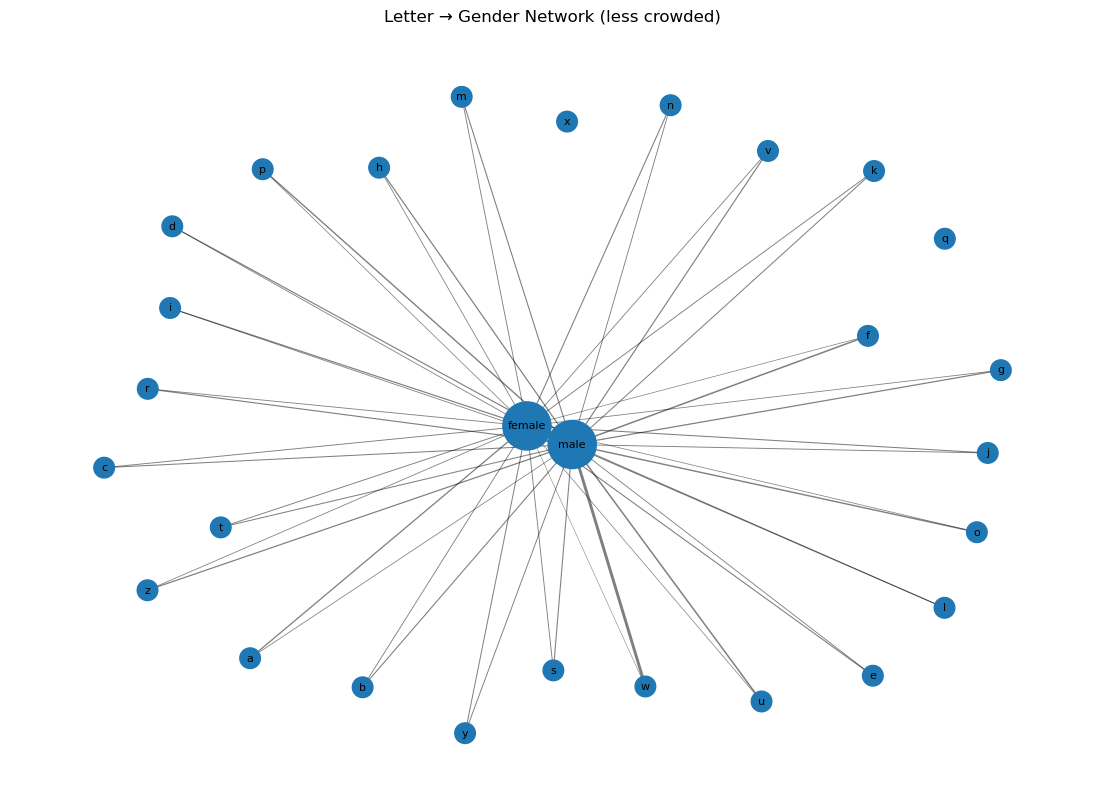

In [8]:
import string
import networkx as nx
import matplotlib.pyplot as plt

def letter_gender_graph(train_names, min_total=80, smooth=1.0):
    letters = list(string.ascii_lowercase)                 # a-z
    genders = sorted(list(set(g for _, g in train_names))) # usually ['female','male']

    # Count how often each letter appears within each gender group
    counts = {g: {ch: 0 for ch in letters} for g in genders}
    totals = {g: 0 for g in genders}  # total letters seen per gender

    for name, g in train_names:
        s = name.lower()
        for ch in s:
            if ch in counts[g]:       # only keep a-z
                counts[g][ch] += 1
                totals[g] += 1

    # Build the network: letters + gender labels as nodes
    G = nx.Graph()
    for g in genders:
        G.add_node(g, kind="gender")
    for ch in letters:
        G.add_node(ch, kind="letter")

    # For a 2-class problem, connect each letter to BOTH genders
    if len(genders) == 2:
        g1, g2 = genders[0], genders[1]
        for ch in letters:
            total_ch = counts[g1][ch] + counts[g2][ch]
            if total_ch < min_total:   # skip rare letters to reduce clutter
                continue

            # Smoothed letter probabilities within each gender
            p1 = (counts[g1][ch] + smooth) / (totals[g1] + smooth * 26)
            p2 = (counts[g2][ch] + smooth) / (totals[g2] + smooth * 26)

            # Edge weights = relative strength (ratio) of association
            w1 = abs(p1 / p2)
            w2 = abs(p2 / p1)

            G.add_edge(ch, g1, weight=w1)
            G.add_edge(ch, g2, weight=w2)

    return G  # networkx graph object

G = letter_gender_graph(train_names, min_total=120, smooth=1.0)

pos = nx.spring_layout(G, seed=9, k=1.6)  # bigger k = more spacing

node_sizes = []
labels = {}
for n, d in G.nodes(data=True):
    if d.get("kind") == "gender":
        node_sizes.append(1200)
        labels[n] = n
    else:
        node_sizes.append(220)
        labels[n] = n

weights = [d.get("weight", 1.0) for *_, d in G.edges(data=True)]
max_w = max(weights) if weights else 1.0
line_w = [0.3 + 1.8 * (w / max_w) for w in weights]

plt.figure(figsize=(14, 10))  # larger canvas
nx.draw_networkx_nodes(G, pos, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=line_w, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)
plt.title("Letter → Gender Network (less crowded)")
plt.axis("off")
plt.show()


# Decision Tree Model Using Feature Set v1
In this step, we train a Decision Tree classifier using the same v1 feature set (last letter, last 2–3 letters, first letter, length, vowel count, and whether the name ends in a vowel). Unlike Naive Bayes, a decision tree learns a sequence of if/then rules that splits the data into increasingly specific groups to make a final gender prediction. We evaluate the tree on both the dev-test and test sets to compare performance, then print a truncated pseudocode view (depth = 4) to show the top levels of the rules the model learned.

In [11]:
dt_1 = nltk.DecisionTreeClassifier.train(train_set, binary=True)  # train a decision tree; binary=True uses binary splits

# Evaluate the decision tree on dev-test (for model tuning) and test (final performance)
print("Decision Tree (v1) dev-test accuracy:", nltk_accuracy(dt_1, devtest_set))
print("Decision Tree (v1) test accuracy:", nltk_accuracy(dt_1, test_set))

# Print a readable, rule-based view of the tree (limited depth so it stays short)
print(dt_1.pseudocode(depth=4))


Decision Tree (v1) dev-test accuracy: 0.796
Decision Tree (v1) test accuracy: 0.762
if last_letter == 'd': return 'male'
if last_letter != 'd': 
  if last_letter == 'r': return 'male'
  if last_letter != 'r': 
    if last_letter == 's': return 'male'
    if last_letter != 's': 
      if last_letter == 'o': return 'male'
      if last_letter != 'o': return 'male'



# Conclusion and Discussion

In this analysis, I tried a few ways to predict whether a name is male or female using the NLTK Names Corpus. I started simple with a baseline Naive Bayes model that only looked at the last letter of each name, just to get a clear starting point. Then I added more useful features—short endings (last 2–3 letters), the first letter, name length, vowel count, and whether the name ends in a vowel. Those small changes made the classifier noticeably better, which shows how much basic spelling patterns matter for this task.

I also compared Naive Bayes to a Decision Tree. Naive Bayes stayed accurate and consistent without getting too complicated. The Decision Tree was easier to “read” because it turns the decision into clear if/then rules, but it also had some awkward or repeated splits, which can happen when a tree learns greedily from the training data. Since the dev-test and test scores were very close, the models seem to generalize pretty well, though the dataset is small so I wouldn’t overstate it. Overall, this project shows why it helps to build up features step by step, compare models instead of relying on one, and use dev-test vs. test results to keep your evaluation honest.